In [2]:
# import the necessary modules here
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [4]:
# Read the data
data = pd.read_csv('SIT720.2-Step2.15-dataset5DGaussian.csv', delimiter=',', header=None).values
print(data.shape)


(200, 5)


### Step 1: Data Normalization

In [5]:
#normalize our data
from sklearn.preprocessing import scale
Xnorm = scale(data)

### Step 2: Implement PCA

In [6]:
#perform PCA using sklearn PCA implementation
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(Xnorm)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)

[0.83743065 0.09909097 0.0345153  0.01793089 0.01103218]


[83.74 93.65 97.1  98.89 99.99]


Text(0, 0.5, 'Variance captured')

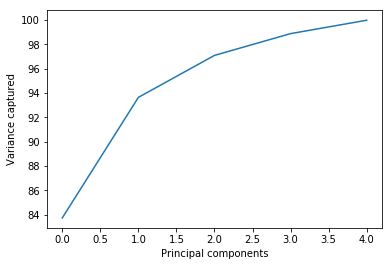

In [8]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [9]:
pca = PCA(n_components=2)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)


(200, 2)


### Step 3: Measuring ‘reconstruction error’


In [12]:
# Reconstruct our data
Xrec = pca.inverse_transform(Zred)
print(Xrec.shape)

(200, 5)


In [13]:
# Measure the reconstruction error
rec_error = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print(rec_error)

0.25194914484908526


In [14]:
nSamples, nDims = Xnorm.shape

# vary principal components from 1 to 5
n_comp = range(1,nDims+1)
print(n_comp)

range(1, 6)


k=1, rec_error=0.4031988912398407
k=2, rec_error=0.25194914484908526
k=3, rec_error=0.17018541021846642
k=4, rec_error=0.10503420093051855
k=5, rec_error=6.415015547505783e-16


Text(0, 0.5, 'Reconstruction Error')

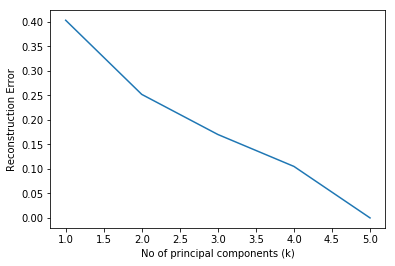

In [15]:
# Initialize vector of rec_error
rec_error = np.zeros(len(n_comp)+1)

for k in n_comp:
    pca = PCA(n_components=k)
    Zred = pca.fit_transform(Xnorm)
    Xrec = pca.inverse_transform(Zred)
    rec_error[k] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
    print("k={}, rec_error={}".format(k, rec_error[k]))

rec_error = rec_error[1:] #we started recording from index 1, so drop index 0


#Visualize the change in error
plt.plot(n_comp,rec_error)
plt.xlabel('No of principal components (k)')
plt.ylabel('Reconstruction Error')